#### Problem - part 1
Consider samples $X_1,\,\dots,\,X_n \sim \text{Bernoulli(p)}$.
Find the plug-in estimator and estimated standard error for $p$.
Find an approximate 90 percent confidence interval for $p$.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from scipy.stats import bernoulli
from scipy.stats import norm

In [2]:
def compute_coverage(n=100, trials=100, p=0.3, alpha=0.1):

    X = bernoulli.rvs(p=p, size=n*trials).reshape([trials, n])

    plugin_p = np.mean(X, axis=1)
    plugin_se_p = np.sqrt(plugin_p * (1-plugin_p) / n)

    z = norm.isf(alpha/2)

    lowerbound_p = plugin_p - z*plugin_se_p
    upperbound_p = plugin_p + z*plugin_se_p

    coverage = sum(
        lowerbound_p_elem < p < upperbound_p_elem
        for (lowerbound_p_elem, upperbound_p_elem)
        in zip(lowerbound_p, upperbound_p)
    )/trials
    
    return coverage

In [3]:
def plot_coverage(nmin=100, nmax=1000, nstep=50, trials=1000, p=0.5, alpha=0.1):

    n = np.arange(nmin, nmax, nstep)
    
    coverage = [compute_coverage(ni, trials=trials, p=p, alpha=alpha) for ni in n]
    
    plt.plot(n, coverage)

    plt.axhline(y=1-alpha, color='r', linestyle='-')
    plt.xlabel('n')
    plt.ylabel('Coverage')

    plt.show()

In [4]:
def plot_coverage_plist(nmin=100, nmax=1000, nstep=50, trials=1000, plist=None, alpha=0.1):
    
    n = np.arange(nmin, nmax, nstep)
    
    for p in plist:
        coverage = [compute_coverage(ni, trials=trials, p=p, alpha=alpha) for ni in n]
        plt.plot(n, coverage, label=f'p = {p}')

    plt.axhline(y=1-alpha, color='r', linestyle='-')
    plt.xlabel('n')
    plt.ylabel('Coverage')
    plt.legend()

    plt.show()

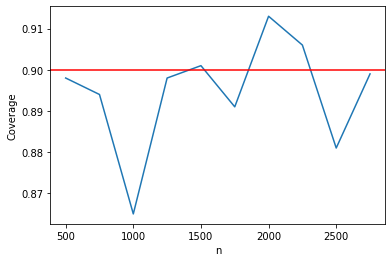

In [5]:
plot_coverage(
    nmin=500,
    nmax=3000,
    nstep=250,
    trials=1000,
    p=0.5,
    alpha=0.1
)

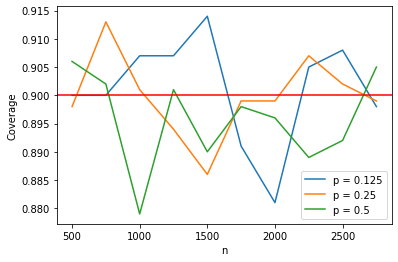

In [6]:
plot_coverage_plist(
    nmin=500,
    nmax=3000,
    nstep=250,
    trials=1000,
    plist=[0.125, 0.25, 0.5],
    alpha=0.1
)

#### Problem - part 2
Consider moreover samples $Y_1,\,\dots,\,Y_n \sim \text{Bernoulli(q)}$.
Find the plug-in estimator and estimated standard error for $p-q$.
Find an approximate 90 percent confidence interval for $p-q$.

In [7]:
def compute_coverage_pq(n=100, trials=100, p=0.3, q=0.4, alpha=0.1):

    X = bernoulli.rvs(p=p, size=n*trials).reshape([trials, n])
    Y = bernoulli.rvs(p=q, size=n*trials).reshape([trials, n])

    plugin_p = np.mean(X, axis=1)
    plugin_q = np.mean(Y, axis=1)
    plugin_pq = plugin_p - plugin_q
    plugin_se = np.sqrt(
        ( plugin_p*(1-plugin_p) + plugin_q*(1-plugin_q) ) / n
    )

    z = norm.isf(alpha/2)

    lowerbound_pq = plugin_pq - z*plugin_se
    upperbound_pq = plugin_pq + z*plugin_se

    coverage = sum(
        lowerbound_pq_elem < p-q < upperbound_pq_elem
        for (lowerbound_pq_elem, upperbound_pq_elem)
        in zip(lowerbound_pq, upperbound_pq)
    )/trials
    
    return coverage

In [8]:
def plot_coverage(nmin=100, nmax=1000, nstep=50, trials=1000, p=0.1, q=0.5, alpha=0.1):

    n = np.arange(nmin, nmax, nstep)
    
    coverage = [compute_coverage_pq(ni, trials=trials, p=p, q=q, alpha=alpha) for ni in n]
    
    plt.plot(n, coverage)

    plt.axhline(y=1-alpha, color='r', linestyle='-')
    plt.xlabel('n')
    plt.ylabel('Coverage')

    plt.show()

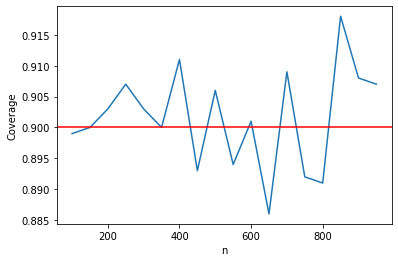

In [9]:
plot_coverage()